## 라이브러리 불러오기

In [1]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd

* [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

In [ ]:
# colab 을 사용한다면 런타임이 초기화 될때마다 다시 설치해 주어야 합니다.
# 로컬 컴퓨터에 설치했다면 이전에 설치된 라이브러리를 사용해 주시면 됩니다.
# !pip install -U finance-datareader

In [2]:
# FinanceDataReader 를 fdr 별칭으로 가져오기
import FinanceDataReader as fdr

## 개별 종목의 일별 시세 수집
* 종목코드로 수집이 가능합니다.
* 종목명을 찾아서 일별 시세를 수집해 주는 함수를 만들어 볼 예정입니다.

In [6]:
# 삼성전자, 2017년~현재 일별 시세 받아오기
# 삼성전자의 종목 번호 '005930'
df = fdr.DataReader("005930", "2017")  # 2017년부터

<AxesSubplot:xlabel='Date'>

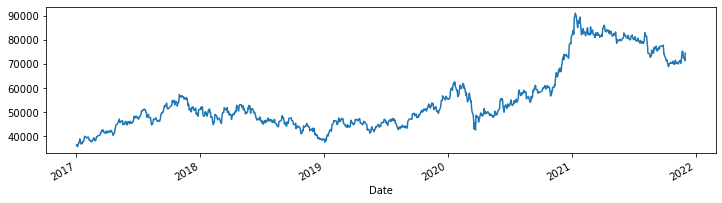

In [13]:
# 종가 시각화 하기
df["Close"].plot(figsize =(12,3))

## 상장종목 목록 가져오기

In [14]:
# 이전 강의에서 저장해 놓았던 csv 파일로 분석을 합니다.
# colab 사용자의 경우 이미 csv 파일이 지워졌을 수 있기 때문에 파일이 없을 경우 아래 셀에서 다시 load하면 됩니다.
df_krx = pd.read_csv("krx.csv")
df_krx.shape

(7120, 10)

In [ ]:
# 위 CSV 파일이 로드되지 않아 당황스러우신가요? 그럼 아래 주석을 풀고 다시 KRX 데이터를 받아오세요.
# colab의 경우 일정 시간이 지나면 런타임이 초기화 되기 때문에 다시 로드하면 데이터를 가져올 수 있습니다.
# df_krx = fdr.StockListing('KRX')

## 상장종목 목록 사용하기
* 종목명과 심볼을 찾기 위해 상장종목 목록을 사용합니다.

In [15]:
# DataFrame 에 어떤 데이터가 들어있는 head()로 일부 데이터만 가져와 봅니다.
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [20]:
# df_krx의 Name column 에서 '하이브'에 해당하는 row를 전부 가져오는데 Name column만 가져와
# list 형태로 index 번호는 빼고 ['하이브'] 만 가져오게 되고 [0]을 통해 list에 있는 string만 가져오게 됩니다.
# 하이브 (series) -> ['하이브'] (list) -> '하이브' (string)
df_krx.loc[(df_krx["Name"] == "하이브")]["Symbol"].tolist()[0]  #.tolist()[0] 
#df_krx.loc[df_krx["Name"] == "하이브", "Symbol"]

'352820'

In [19]:
# '히트'라는 이름을 가진 상장사가 있는지 확인해 보기
df_krx.loc[(df_krx["Name"] == "히트")]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region


## 종목명으로 종목 코드를 받아오는 함수 만들기

In [25]:
# 종목명으로 종목코드 받아오는 함수 만들기
# df_krx의 Name column에서 같은 값이 있으면 
# row의 Symbol column의 값을 list로 name_list에 저장하기
# item_code_by_item_name 함수를 만듭니다.

def item_code_by_item_name(item_name):
    """
    종목명을 받아 종목코드를 찾아 반환하는 함수
    """
    sym = df_krx.loc[df_krx["Name"] == item_name , "Symbol"].tolist() 
    item_code = False
    if len(sym) > 0:
        item_code = sym[0]
    return item_code


In [26]:
item_name = "하이브"
item_code_by_item_name(item_name)

'352820'

In [27]:
# 네이버로 등록된 상장사는 없습니다.
# 잘못 입력된 텍스트에 대해 예외처리를 하는지 확인합니다.
item_name = "네이버"
item_code_by_item_name(item_name)

False

In [28]:
# 네이버는 NAVER로 등록되어 있습니다.
item_name = "NAVER"
item_code_by_item_name(item_name)

'035420'

In [29]:
# 삼성전자
item_name = "삼성전자"
item_code_by_item_name(item_name)

'005930'

In [30]:
# 셀트리온과 카카오게임즈도 확인하여 봅니다.
item_name = "셀트리온"
item_code_by_item_name(item_name)

'068270'

In [31]:
item_name = "카카오게임즈"
item_code_by_item_name(item_name)

'293490'

In [32]:
fdr.DataReader(item_code_by_item_name(item_name))

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-09-10,48000,62400,48000,62400,561750,NaN
2020-09-11,81100,81100,81100,81100,5013124,0.299679
2020-09-14,86500,89100,73400,73800,20213705,-0.090012
2020-09-15,69900,71200,67100,67500,8309414,-0.085366
2020-09-16,66200,69500,65400,66300,5054826,-0.017778
...,...,...,...,...,...,...
2021-11-25,96900,103000,96900,101100,3684202,0.049844
2021-11-26,101900,106700,100100,102400,2859762,0.012859
2021-11-29,99500,107800,99200,102800,2752409,0.003906


## 종목명으로 일별시세를 받아오는 함수 만들기

In [33]:
# item_code_by_item_name : 종목명으로 종목번호 가져오기
# find_item_list : 종목번호로 해당연도 데이터 가져오기
# find_item_list는 year 값이 없으면 기본으로 2020년 데이터를 선택
def find_item_list(item_name, year=2020):
    """
    종목명을 넘겨주면 일별시세를 반환하는 함수
    내부에서 종목명으로 종목코드를 반환하는 함수(item_code_by_item_name)로
    종목의 시세를 수집합니다.
    """
    df_day = fdr.DataReader(item_code_by_item_name(item_name), str(year))
    return df_day


In [36]:
find_item_list("삼성전자", 2020)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2021-11-25,75100,75100,73600,73700,12559258,-0.014706
2021-11-26,73500,74100,72000,72300,13002242,-0.018996
2021-11-29,71700,73000,71400,72300,16682559,0.000000


### 종목명으로 일별 시세를 잘 가져오는지 확인하기

In [38]:
# LG화학의 데이터를 가져옵니다.
find_item_list("LG화학", 2021)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,849000,900000,835000,889000,858451,0.078883
2021-01-05,891000,893000,875000,893000,371709,0.004499
2021-01-06,908000,912000,883000,890000,513628,-0.003359
2021-01-07,910000,969000,896000,962000,706912,0.080899
2021-01-08,989000,1016000,970000,999000,924780,0.038462
...,...,...,...,...,...,...
2021-11-25,741000,748000,737000,739000,112764,-0.010710
2021-11-26,734000,740000,720000,721000,201250,-0.024357
2021-11-29,715000,723000,710000,712000,171460,-0.012483


In [37]:
# 빅히트의 데이터를 가져옵니다.
# stock_daily 변수에 담습니다.
find_item_list("대한항공", 2021)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,21284,22021,21013,21440,4355156,0.016547
2021-01-05,21400,22098,21013,21982,4013283,0.025280
2021-01-06,21749,22292,21555,21905,4377141,-0.003503
2021-01-07,22021,22176,21711,21866,2909181,-0.001780
2021-01-08,21866,21866,21323,21633,3624498,-0.010656
...,...,...,...,...,...,...
2021-11-25,28650,28650,28050,28150,1864921,-0.017452
2021-11-26,28000,28050,27100,27200,2969702,-0.033748
2021-11-29,25500,27100,25450,26550,4325545,-0.023897


## 개별종목 시세 시각화
### pandas 의 plot으로 시각화 하기

In [39]:
# stock_daily 변수에 할당된 수집된 데이터의 종가 그래프를 그립니다.
stock_daily = find_item_list("대한항공", 2021)

<AxesSubplot:xlabel='Date'>

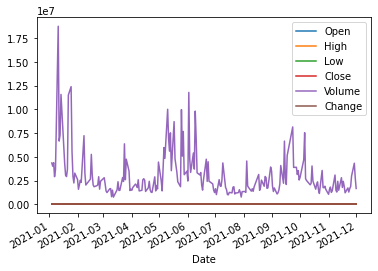

In [42]:
# 전체 데이터프레임을 plot() 으로 시각화 하면 수치 데이터 전체를 선그래프로 그립니다.
stock_daily.plot()

### 서브플롯 그리기

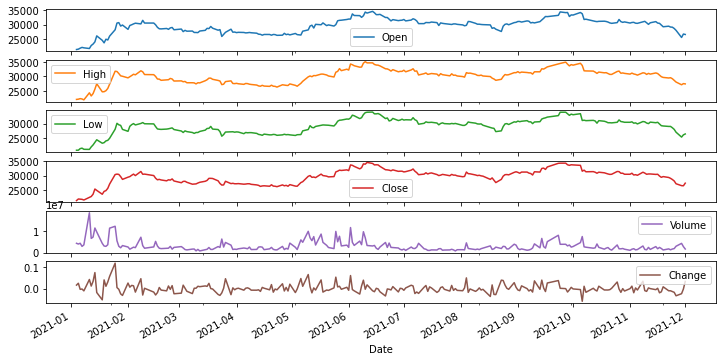

In [40]:
# 수집한 종목의 선그래프를 Pandas 로 그립니다.
# 스케일이 다르기 때문에 subplots를 사용해 그려봅니다.
import matplotlib.pyplot as plt
stock_daily.plot(subplots = True, figsize = (12,6))
plt.show()

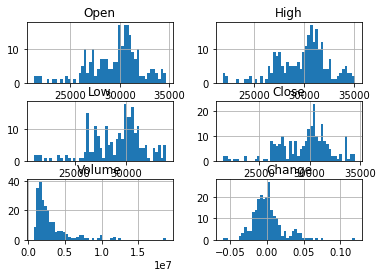

In [41]:
# 히스토그램 그리기
_ = stock_daily.hist(bins = 50)

### 2축 그래프 그리기

<AxesSubplot:xlabel='Date'>

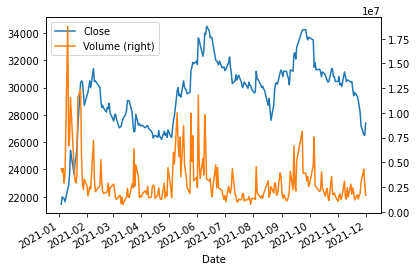

In [49]:
# secondary_y 옵션을 통한 종가와 거래량에 대한 2축 그래프 그리기

stock_daily[["Close", "Volume"]].plot(secondary_y = "Volume")


In [50]:
1e7 # 10의 7승

10000000.0